In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
image_path1 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\524036004_6747cf909b.jpg"  
image_path2 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\544576742_283b65fa0d.jpg"

In [5]:
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

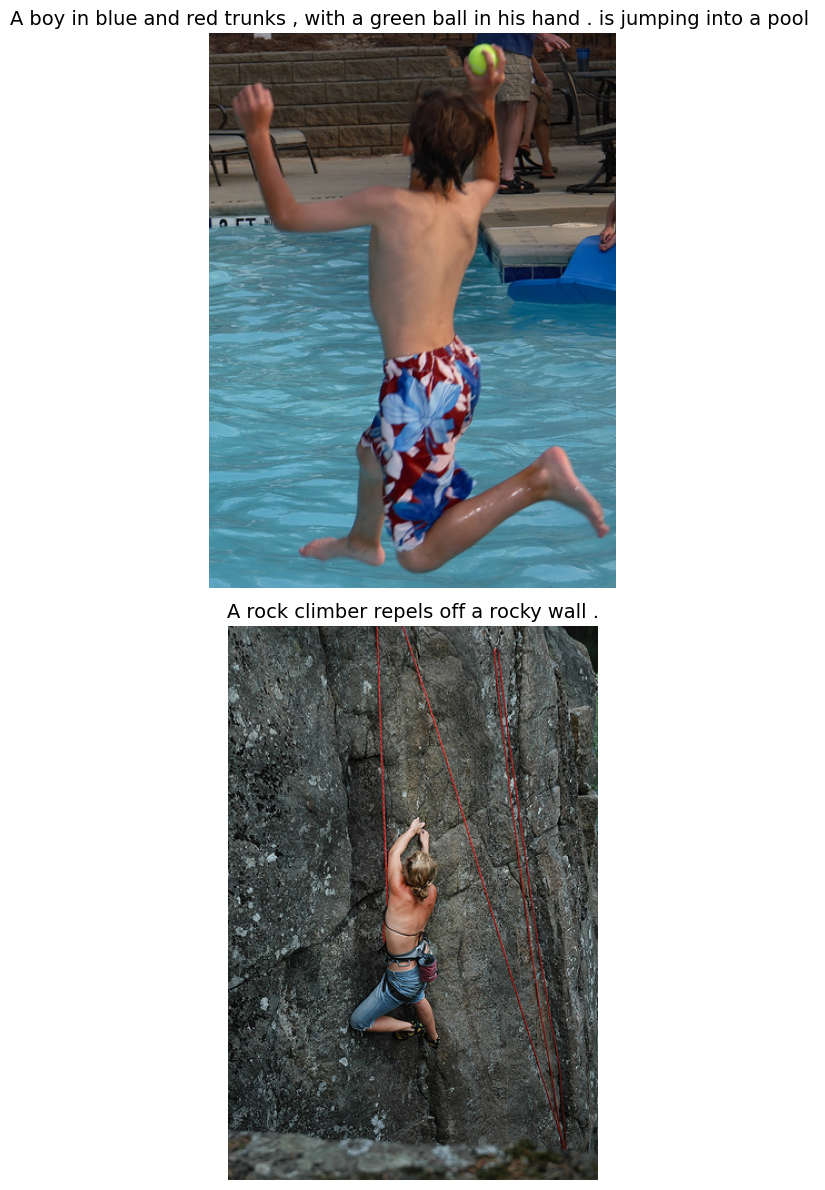

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  

axes[0].imshow(img1)
axes[0].axis('off')  
axes[0].set_title("A boy in blue and red trunks , with a green ball in his hand . is jumping into a pool ", fontsize=14)

axes[1].imshow(img2)
axes[1].axis('off')  
axes[1].set_title("A rock climber repels off a rocky wall .", fontsize=14)

plt.tight_layout()  
plt.show()

installing and importing required libraries required for loading the pre-trained BERT tokenizer and model

In [7]:
!pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable


In [162]:
from transformers import BertTokenizerFast, BertModel
import torch

loading the pre-trained BERT tokenizer and model

In [163]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [164]:
def get_bert_embeddings(sentence):
    #tokenizing the input senetences and converting it to input IDs and attention masks
    inputs = tokenizer(sentence, return_tensors='pt', padding='longest', truncation=True, max_length=None)  # Set max_length=None for no truncation

    #extracting the emneddings from the BERT model
    with torch.no_grad():
        outputs = model(**inputs)
        
    #last hidden state is required for the sentence embedding
    #taking mean of the token emveddings to get a single embedding for the sentence
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()

    return embeddings

In [165]:
sentence1 = "A boy in blue and red trunks , with a green ball in his hand . is jumping into a pool."
sentence2 = "A rock climber repels off a rocky wall ."

In [168]:
input1 = tokenizer(sentence1, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens1 = tokenizer.convert_ids_to_tokens(input1['input_ids'].squeeze().tolist())

input2 = tokenizer(sentence2, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens2 = tokenizer.convert_ids_to_tokens(input2['input_ids'].squeeze().tolist())


In [169]:
print("Tokens 1:", tokens1)
print("Input IDs 1:", input1['input_ids'])
print("Attention Mask 1:", input1['attention_mask'])

Tokens 1: ['[CLS]', 'a', 'boy', 'in', 'blue', 'and', 'red', 'trunks', ',', '[SEP]']
Input IDs 1: tensor([[  101,  1037,  2879,  1999,  2630,  1998,  2417, 20509,  1010,   102]])
Attention Mask 1: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [122]:
print("Input IDs 2:", input2['input_ids'])
print("Attention Mask 2:", input2['attention_mask'])
print("Tokens: 2", tokens2)

Input IDs 2: tensor([[  101,  1037,  2600,  7105,  2121, 16360,  9050,  2125,  1037,   102]])
Attention Mask 2: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Tokens: 2 ['[CLS]', 'a', 'rock', 'climb', '##er', 'rep', '##els', 'off', 'a', '[SEP]']


In [123]:
#printing tokesn after removing special characters
filtered_tokens1 = [token for token in tokens1 if token not in ['[CLS]', '[SEP]']]
print("Tokens 1 (without special tokens):", filtered_tokens1)
filtered_tokens2 = [token for token in tokens2 if token not in ['[CLS]', '[SEP]']]
print("Tokens 2 (without special tokens):", filtered_tokens2)

Tokens 1 (without special tokens): ['a', 'boy', 'in', 'blue', 'and', 'red', 'trunks', ',']
Tokens 2 (without special tokens): ['a', 'rock', 'climb', '##er', 'rep', '##els', 'off', 'a']


In [124]:
# getting the BERT embeddings for the sentence
embedding1 = get_bert_embeddings(sentence1)
embedding2 = get_bert_embeddings(sentence2)

In [125]:
print("Tokens 1:", tokens1)
print("Sentence Embedding 1 Shape:", embedding1.shape)
print("Sentence Embedding 1:", embedding1)

Tokens 1: ['[CLS]', 'a', 'boy', 'in', 'blue', 'and', 'red', 'trunks', ',', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([ 3.0904e-03, -3.3137e-01,  1.0377e-03, -1.0999e-02,  1.2573e-01,
        -3.3650e-01, -2.9704e-01,  7.2097e-01, -4.9986e-01, -1.7922e-01,
        -1.5134e-01, -5.5887e-01, -2.8893e-01,  5.7549e-02, -3.8018e-02,
         3.3806e-01,  5.2913e-01,  3.6040e-01, -1.1285e-01,  5.2738e-01,
        -1.3852e-01,  2.2349e-02, -2.7421e-01,  8.5655e-02,  7.1608e-01,
        -5.4200e-03, -1.3552e-02,  2.4185e-01,  4.8807e-02, -1.2317e-01,
         3.7891e-01,  1.6795e-01,  3.7434e-01, -4.0343e-02, -2.2715e-01,
        -2.2363e-01, -2.1074e-02, -6.3150e-02, -1.7609e-01,  1.3445e-01,
        -5.1961e-01, -2.9616e-01, -3.2932e-01, -4.8974e-02,  2.9856e-01,
        -4.3596e-01,  4.2017e-01, -2.1444e-01,  2.4469e-03,  1.5446e-01,
        -3.0960e-01,  2.8467e-01, -2.6747e-01, -1.1258e-01,  2.5562e-02,
         3.9442e-01, -1.2909e-01, -2.4100e-01

In [126]:
print("Tokens 2:", tokens2)
print("Sentence Embedding 2 Shape:", embedding2.shape)
print("Sentence Embedding 2:", embedding2)

Tokens 2: ['[CLS]', 'a', 'rock', 'climb', '##er', 'rep', '##els', 'off', 'a', '[SEP]']
Sentence Embedding 2 Shape: torch.Size([768])
Sentence Embedding 2: tensor([-1.0666e-01,  9.1435e-02, -2.3007e-01, -1.5326e-01,  1.1688e-01,
         7.5451e-02,  2.9131e-01,  3.5775e-01, -2.3065e-01,  7.2118e-02,
        -1.9600e-01, -3.0982e-01,  6.2889e-02,  2.1076e-01, -4.3938e-01,
         2.2428e-01,  4.0834e-02,  3.5225e-02, -3.1910e-01,  6.3148e-01,
         1.1075e-01,  8.4979e-02, -3.4646e-01,  3.0726e-01,  7.4944e-01,
         1.2498e-01, -1.4851e-01,  8.9570e-02, -1.1402e-01, -9.9523e-02,
         3.3837e-01,  2.3123e-01,  2.4710e-02, -2.4652e-01, -4.7769e-02,
         6.8996e-02,  1.4742e-01, -1.6992e-01, -4.1351e-01, -6.4413e-02,
        -6.7439e-01, -7.6741e-02, -6.7272e-02,  2.7925e-01, -1.6121e-01,
         4.6470e-03,  3.8884e-01, -2.4697e-02, -7.9658e-03, -5.9943e-02,
        -5.3715e-01,  3.6582e-01, -4.5791e-01,  1.5302e-02, -2.4999e-01,
         7.3479e-01,  3.7442e-02, -4.4471e

In [127]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
embedding1 = embedding1.detach().numpy()
embedding2 = embedding2.detach().numpy()

In [129]:
similarity = cosine_similarity([embedding1], [embedding2])
print(similarity[0][0])

0.7251283


-1 (completely opposite) to 1 (completely similar)  
-> closer to 1 indicates high similarity  
-> closer to -1 indicates dissimilarity

-> 1 means the vectors are identical or point in the exact same direction  
-> 0 means the vectors are orthogonal or completely unrelated  
-> -1 means the vectors are opposite or point in completely opposite directions

score of 0.7251283 indicates that the two embeddings share a fairly strong similarity, but they are not identical, in context of text embeddings, this means the two sentences or words being compared are contextually or semantically similar but not exactly the same.

# ...................................................................

In [130]:
image_path3 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\cat1.png"  
image_path4 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\cat2.png"

In [131]:
img3 = mpimg.imread(image_path3)
img4 = mpimg.imread(image_path4)

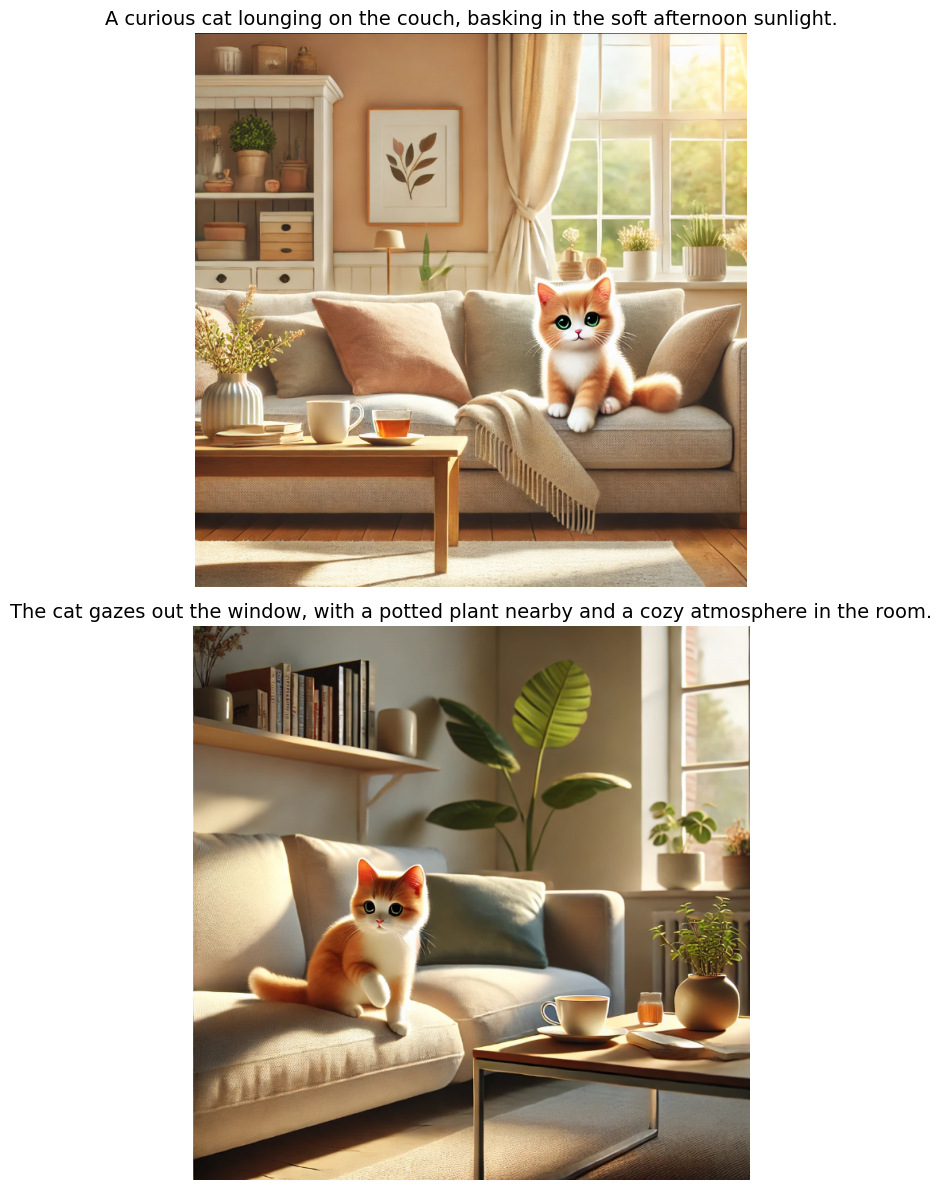

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  

axes[0].imshow(img3)
axes[0].axis('off')  
axes[0].set_title("A curious cat lounging on the couch, basking in the soft afternoon sunlight.", fontsize=14)

axes[1].imshow(img4)
axes[1].axis('off')  
axes[1].set_title("The cat gazes out the window, with a potted plant nearby and a cozy atmosphere in the room.", fontsize=14)

plt.tight_layout()  
plt.show()

In [133]:
sentence3 = "A curious cat lounging on the couch, basking in the soft afternoon sunlight."
sentence4 = "The cat gazes out the window, with a potted plant nearby and a cozy atmosphere in the room."

In [134]:
input3 = tokenizer(sentence3, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens3 = tokenizer.convert_ids_to_tokens(input3['input_ids'].squeeze().tolist())

input4 = tokenizer(sentence4, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens4 = tokenizer.convert_ids_to_tokens(input4['input_ids'].squeeze().tolist())


In [135]:
print("Tokens 3:", tokens3)
print("Input IDs 3:", input3['input_ids'])
print("Attention Mask 3:", input3['attention_mask'])

Tokens 3: ['[CLS]', 'a', 'curious', 'cat', 'lou', '##nging', 'on', 'the', 'couch', '[SEP]']
Input IDs 3: tensor([[  101,  1037,  8025,  4937, 10223, 22373,  2006,  1996,  6411,   102]])
Attention Mask 3: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [136]:
print("Input IDs 4:", input4['input_ids'])
print("Attention Mask 4:", input4['attention_mask'])
print("Tokens: 4", tokens4)

Input IDs 4: tensor([[  101,  1996,  4937, 23514,  2041,  1996,  3332,  1010,  2007,   102]])
Attention Mask 4: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Tokens: 4 ['[CLS]', 'the', 'cat', 'gazes', 'out', 'the', 'window', ',', 'with', '[SEP]']


In [137]:
#printing tokesn after removing special characters
filtered_tokens3 = [token for token in tokens3 if token not in ['[CLS]', '[SEP]']]
print("Tokens 3 (without special tokens):", filtered_tokens3)
filtered_tokens4 = [token for token in tokens4 if token not in ['[CLS]', '[SEP]']]
print("Tokens 4 (without special tokens):", filtered_tokens4)

Tokens 3 (without special tokens): ['a', 'curious', 'cat', 'lou', '##nging', 'on', 'the', 'couch']
Tokens 4 (without special tokens): ['the', 'cat', 'gazes', 'out', 'the', 'window', ',', 'with']


In [138]:
# getting the BERT embeddings for the sentence
embedding3 = get_bert_embeddings(sentence3)
embedding4 = get_bert_embeddings(sentence4)

In [139]:
print("Tokens 3:", tokens3)
print("Sentence Embedding 3 Shape:", embedding3.shape)
print("Sentence Embedding 3:", embedding3)

Tokens 3: ['[CLS]', 'a', 'curious', 'cat', 'lou', '##nging', 'on', 'the', 'couch', '[SEP]']
Sentence Embedding 3 Shape: torch.Size([768])
Sentence Embedding 3: tensor([-7.8904e-02, -2.0776e-01,  1.5135e-01,  1.6442e-01,  4.6792e-01,
        -5.1990e-01, -3.1309e-01,  5.0797e-01, -5.0249e-01,  2.8149e-01,
         1.9190e-01, -4.9136e-01, -5.4253e-01,  3.0576e-01, -5.9773e-02,
         2.7252e-01,  3.3243e-01,  4.2648e-01, -5.1888e-01,  6.7179e-01,
         6.3503e-02, -2.6978e-01, -4.7844e-01,  5.9235e-01,  5.0797e-01,
        -2.0850e-01,  1.8769e-01,  1.8060e-01, -6.6587e-02,  1.4899e-01,
         2.4197e-01, -1.2629e-01, -2.5051e-01, -5.2714e-01,  5.4533e-02,
         1.0709e-01,  2.3243e-01,  3.1644e-02, -4.6904e-01,  2.7963e-01,
        -3.2202e-01, -5.1494e-01,  3.4284e-01,  5.6187e-01,  2.4634e-01,
        -1.2482e-01,  5.0263e-01,  8.2651e-02,  5.6728e-01, -1.0088e-01,
        -2.6358e-01,  2.6269e-01,  2.6606e-01,  2.3135e-01,  1.5211e-01,
         9.5856e-01, -3.3168e-01, -8.

In [140]:
print("Tokens 4:", tokens4)
print("Sentence Embedding 4 Shape:", embedding4.shape)
print("Sentence Embedding 4:", embedding4)

Tokens 4: ['[CLS]', 'the', 'cat', 'gazes', 'out', 'the', 'window', ',', 'with', '[SEP]']
Sentence Embedding 4 Shape: torch.Size([768])
Sentence Embedding 4: tensor([ 4.0576e-02, -7.4008e-02, -5.5932e-02,  1.3992e-01,  2.5893e-01,
        -4.6694e-01, -3.7745e-01,  5.9571e-01, -1.7740e-02, -1.4287e-01,
         2.2955e-02, -7.4974e-01, -3.0897e-01,  6.1191e-01, -2.9238e-01,
         3.0477e-02,  3.5621e-01,  3.6936e-01, -1.3726e-01,  1.1348e-01,
         2.5167e-01, -4.5707e-02, -3.8657e-01,  2.2113e-01,  7.0488e-01,
        -1.7285e-01,  2.2549e-01,  2.0364e-01,  4.5893e-02,  1.6633e-01,
         4.6304e-01,  1.0321e-01, -2.1473e-01, -4.3481e-01,  8.4033e-02,
        -1.4385e-01,  2.1295e-01,  8.9394e-02, -4.5308e-01,  7.1134e-02,
        -4.1141e-01, -6.2344e-01,  2.8306e-01,  4.7089e-01,  2.0771e-01,
        -5.3908e-01,  7.7533e-02, -5.0908e-02,  2.1494e-01,  1.9066e-01,
        -5.0975e-01,  1.8157e-01,  1.2329e-01, -1.2253e-03,  4.6070e-02,
         9.4941e-01, -2.9070e-01, -6.389

In [141]:
embedding3 = embedding3.detach().numpy()
embedding4 = embedding4.detach().numpy()

In [142]:
similarity = cosine_similarity([embedding3], [embedding4])
print(similarity[0][0])

0.8331497


In [143]:
distance = euclidean(embedding3, embedding4)
print(distance)

6.189594268798828


score of 0.8331497 indicates a high degree of similarity between them, suggests that texts (words, phrases, or sentences) being compared are highly related in meaning or context, though not perfectly identical, reflects, for example, synonymous phrases or sentences with similar content

In [144]:
image_path5 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\dissimilar1.png"
image_path6 = r"C:\Users\Pravalika Arunkumar\Documents\4th YEAR\SEMESTER - 7\Capstone Project I\dissimilar2.png"

In [145]:
img5 = mpimg.imread(image_path5)
img6 = mpimg.imread(image_path6)

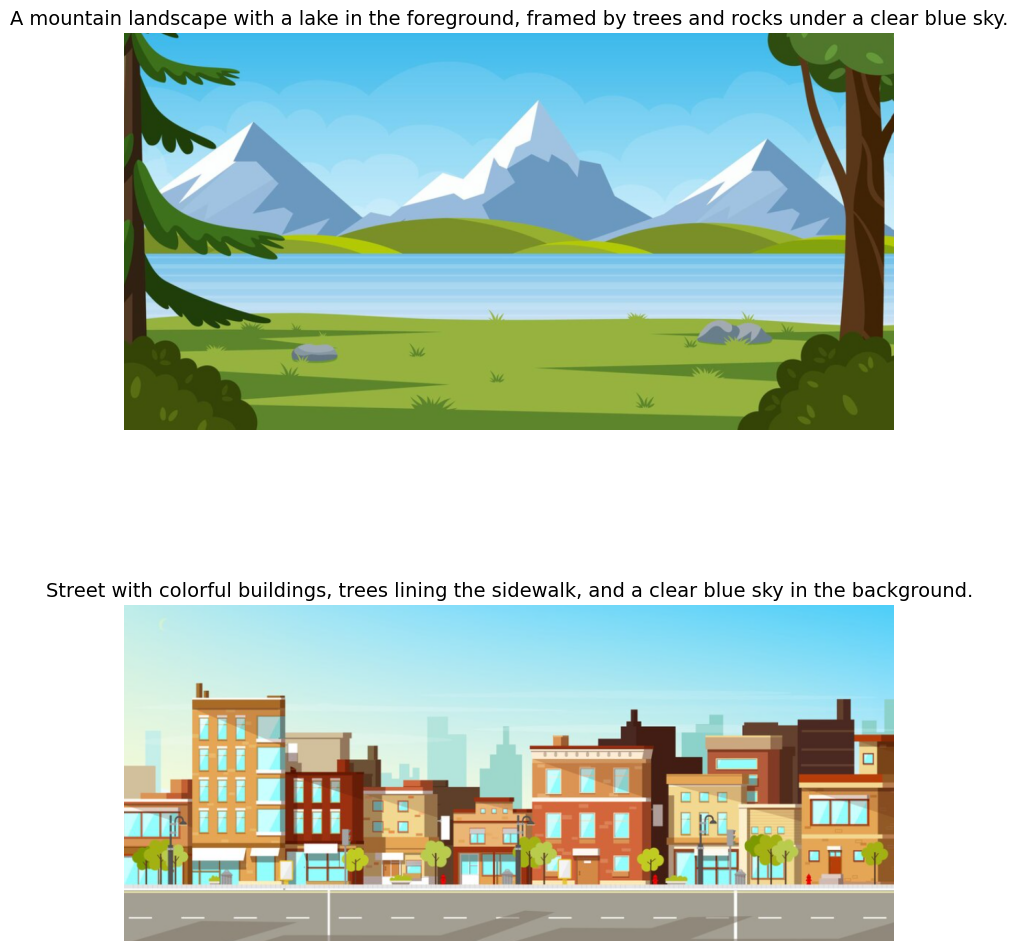

In [146]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))  

axes[0].imshow(img5)
axes[0].axis('off')  
axes[0].set_title("A mountain landscape with a lake in the foreground, framed by trees and rocks under a clear blue sky.", fontsize=14)

axes[1].imshow(img6)
axes[1].axis('off')  
axes[1].set_title("Street with colorful buildings, trees lining the sidewalk, and a clear blue sky in the background.", fontsize=14)

plt.tight_layout()  
plt.show()

In [147]:
sentence5 = "A mountain landscape with a lake in the foreground, framed by trees and rocks under a clear blue sky."
sentence6 = "Street with colorful buildings, trees lining the sidewalk, and a clear blue sky in the background."

In [148]:
input5 = tokenizer(sentence5, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens5 = tokenizer.convert_ids_to_tokens(input5['input_ids'].squeeze().tolist())

input6 = tokenizer(sentence6, return_tensors='pt', padding=True, truncation=True, max_length=10)
#converting input IDs to tokens
tokens6 = tokenizer.convert_ids_to_tokens(input6['input_ids'].squeeze().tolist())


In [149]:
print("Tokens 5:", tokens5)
print("Input IDs 5:", input5['input_ids'])
print("Attention Mask 5:", input5['attention_mask'])

Tokens 5: ['[CLS]', 'a', 'mountain', 'landscape', 'with', 'a', 'lake', 'in', 'the', '[SEP]']
Input IDs 5: tensor([[ 101, 1037, 3137, 5957, 2007, 1037, 2697, 1999, 1996,  102]])
Attention Mask 5: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [150]:
print("Input IDs 6:", input6['input_ids'])
print("Attention Mask 6:", input6['attention_mask'])
print("Tokens: 6", tokens6)

Input IDs 6: tensor([[  101,  2395,  2007, 14231,  3121,  1010,  3628, 14834,  1996,   102]])
Attention Mask 6: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Tokens: 6 ['[CLS]', 'street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the', '[SEP]']


In [151]:
tokens = tokenizer.tokenize(sentence6)
num_tokens = len(tokens)

In [152]:
print("Number of tokens:", num_tokens)
print("Tokens:", tokens)

Number of tokens: 19
Tokens: ['street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the', 'sidewalk', ',', 'and', 'a', 'clear', 'blue', 'sky', 'in', 'the', 'background', '.']


In [153]:
#printing tokesn after removing special characters
filtered_tokens5 = [token for token in tokens5 if token not in ['[CLS]', '[SEP]']]
print("Tokens 5 (without special tokens):", filtered_tokens5)
filtered_tokens6 = [token for token in tokens6 if token not in ['[CLS]', '[SEP]']]
print("Tokens 6 (without special tokens):", filtered_tokens6)

Tokens 5 (without special tokens): ['a', 'mountain', 'landscape', 'with', 'a', 'lake', 'in', 'the']
Tokens 6 (without special tokens): ['street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the']


In [154]:
# getting the BERT embeddings for the sentence
embedding5 = get_bert_embeddings(sentence5)
embedding6 = get_bert_embeddings(sentence6)

In [155]:
print("Tokens 5:", tokens5)
print("Sentence Embedding 5 Shape:", embedding5.shape)
print("Sentence Embedding 5:", embedding5)

Tokens 5: ['[CLS]', 'a', 'mountain', 'landscape', 'with', 'a', 'lake', 'in', 'the', '[SEP]']
Sentence Embedding 5 Shape: torch.Size([768])
Sentence Embedding 5: tensor([-1.3958e-01,  4.1888e-03, -3.6436e-02,  3.2705e-02,  2.3300e-01,
        -1.6311e-01, -2.4680e-01,  6.0955e-01, -2.9291e-01, -1.3378e-01,
        -2.9856e-01, -5.5343e-01, -2.7512e-01,  5.8469e-01,  1.8264e-01,
         1.5357e-01,  9.8236e-02,  1.7371e-01, -4.3250e-01,  2.3025e-01,
         6.7658e-02, -2.4744e-01, -4.8241e-01,  2.9283e-01,  6.2001e-01,
         5.0268e-02,  2.9752e-01,  4.2653e-01,  1.2405e-02,  3.8284e-01,
         2.7300e-01,  1.0709e-01, -2.8566e-01, -3.9025e-01,  1.0953e-01,
        -1.4872e-01, -1.5821e-01,  3.4522e-02, -4.7088e-01, -1.0786e-02,
        -3.9312e-01, -5.2430e-01,  2.6795e-02, -8.8233e-02,  1.2808e-01,
        -5.2026e-01,  3.4113e-01, -6.9311e-02, -2.2850e-02,  4.1822e-01,
        -3.2040e-01,  2.0327e-01, -1.1673e-01,  1.4231e-01,  2.5866e-01,
         6.9055e-01, -6.2299e-02, -5

In [156]:
print("Tokens 6:", tokens6)
print("Sentence Embedding 6 Shape:", embedding6.shape)
print("Sentence Embedding 6:", embedding6)

Tokens 6: ['[CLS]', 'street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the', '[SEP]']
Sentence Embedding 6 Shape: torch.Size([768])
Sentence Embedding 6: tensor([ 1.0107e-01, -8.5040e-02, -1.4937e-01,  1.9036e-01,  2.9435e-01,
        -3.1761e-01, -4.5322e-01,  8.0428e-01, -2.1752e-01, -4.3433e-01,
        -1.0688e-01, -6.7049e-01, -5.5451e-01,  8.7215e-01, -3.4061e-02,
         7.7365e-02,  3.3323e-01,  3.6032e-01, -1.4413e-01,  4.2456e-01,
        -6.2007e-02, -4.2104e-01, -3.6159e-01,  2.4793e-01,  4.1272e-01,
        -1.7313e-02,  4.4358e-02,  4.1580e-01, -1.5875e-01,  1.9181e-01,
         2.3618e-01,  1.9343e-01, -3.3339e-01, -2.9299e-01,  2.1622e-01,
        -1.8624e-01, -5.2793e-02,  4.3568e-02, -4.6404e-01,  1.3135e-01,
        -5.4425e-01, -4.4609e-01,  3.5886e-01,  5.3916e-02, -1.2048e-01,
        -5.3021e-01,  1.9371e-01, -1.2834e-01, -6.3186e-02,  1.3195e-01,
        -2.0993e-01,  1.6752e-01, -2.8019e-01,  2.8825e-01,  1.0505e-01,
         7.0230e-01, -1.54

In [157]:
embedding5 = embedding5.detach().numpy()
embedding6 = embedding6.detach().numpy()

In [158]:
similarity = cosine_similarity([embedding5], [embedding6])
print(similarity[0][0])

0.89224607


In [159]:
from scipy.spatial.distance import euclidean


In [160]:
distance = euclidean(embedding5, embedding6)
print(distance)

4.628030776977539


In [161]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "A boy in blue and red trunks , with a green ball in his hand . is jumping into a pool."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings.shape)
print("Sentence Embedding 1:", embeddings)

Tokens 1: ['[CLS]', 'a', 'boy', 'in', 'blue', 'and', 'red', 'trunks', ',', 'with', 'a', 'green', 'ball', 'in', 'his', 'hand', '.', 'is', 'jumping', 'into', 'a', 'pool', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([ 3.0904e-03, -3.3137e-01,  1.0377e-03, -1.0999e-02,  1.2573e-01,
        -3.3650e-01, -2.9704e-01,  7.2097e-01, -4.9986e-01, -1.7922e-01,
        -1.5134e-01, -5.5887e-01, -2.8893e-01,  5.7549e-02, -3.8018e-02,
         3.3806e-01,  5.2913e-01,  3.6040e-01, -1.1285e-01,  5.2738e-01,
        -1.3852e-01,  2.2349e-02, -2.7421e-01,  8.5655e-02,  7.1608e-01,
        -5.4200e-03, -1.3552e-02,  2.4185e-01,  4.8807e-02, -1.2317e-01,
         3.7891e-01,  1.6795e-01,  3.7434e-01, -4.0343e-02, -2.2715e-01,
        -2.2363e-01, -2.1074e-02, -6.3150e-02, -1.7609e-01,  1.3445e-01,
        -5.1961e-01, -2.9616e-01, -3.2932e-01, -4.8974e-02,  2.9856e-01,
        -4.3596e-01,  4.2017e-01, -2.1444e-01,  2.4469e-03,  1.5446e-01,
        -3.0960e-01

In [177]:
from transformers import BertTokenizerFast, BertModel

# Load the BERT model and tokenizer (fast version)
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

def get_bert_embeddings(sentence):
    # Tokenize the input sentence using the fast tokenizer
    inputs = tokenizer(sentence, return_tensors='pt', padding='longest', truncation=False)

    # Extract the embeddings from the BERT model
    with torch.no_grad():
        outputs = model(**inputs)
        
    # Last hidden state is required for the sentence embedding
    # Taking mean of the token embeddings to get a single embedding for the sentence
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()

    return embeddings

# Test the function
sentence1 = "A boy in blue and red trunks , with a green ball in his hand . is jumping into a pool."
embedding1 = get_bert_embeddings(sentence1)
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

print("Sentence Embedding 1 Shape:", embedding1.shape)
print("Sentence Embedding 1:", embedding1)


Tokens 1: ['[CLS]', 'street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the', 'sidewalk', ',', 'and', 'a', 'clear', 'blue', 'sky', 'in', 'the', 'background', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([ 3.0904e-03, -3.3137e-01,  1.0377e-03, -1.0999e-02,  1.2573e-01,
        -3.3650e-01, -2.9704e-01,  7.2097e-01, -4.9986e-01, -1.7922e-01,
        -1.5134e-01, -5.5887e-01, -2.8893e-01,  5.7549e-02, -3.8018e-02,
         3.3806e-01,  5.2913e-01,  3.6040e-01, -1.1285e-01,  5.2738e-01,
        -1.3852e-01,  2.2349e-02, -2.7421e-01,  8.5655e-02,  7.1608e-01,
        -5.4200e-03, -1.3552e-02,  2.4185e-01,  4.8807e-02, -1.2317e-01,
         3.7891e-01,  1.6795e-01,  3.7434e-01, -4.0343e-02, -2.2715e-01,
        -2.2363e-01, -2.1074e-02, -6.3150e-02, -1.7609e-01,  1.3445e-01,
        -5.1961e-01, -2.9616e-01, -3.2932e-01, -4.8974e-02,  2.9856e-01,
        -4.3596e-01,  4.2017e-01, -2.1444e-01,  2.4469e-03,  1.5446e-01,
        -3.096

In [178]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "A rock climber repels off a rocky wall ."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings2 = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings2.shape)
print("Sentence Embedding 1:", embeddings2)

Tokens 1: ['[CLS]', 'a', 'rock', 'climb', '##er', 'rep', '##els', 'off', 'a', 'rocky', 'wall', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([-1.0666e-01,  9.1435e-02, -2.3007e-01, -1.5326e-01,  1.1688e-01,
         7.5451e-02,  2.9131e-01,  3.5775e-01, -2.3065e-01,  7.2118e-02,
        -1.9600e-01, -3.0982e-01,  6.2889e-02,  2.1076e-01, -4.3938e-01,
         2.2428e-01,  4.0834e-02,  3.5225e-02, -3.1910e-01,  6.3148e-01,
         1.1075e-01,  8.4979e-02, -3.4646e-01,  3.0726e-01,  7.4944e-01,
         1.2498e-01, -1.4851e-01,  8.9570e-02, -1.1402e-01, -9.9523e-02,
         3.3837e-01,  2.3123e-01,  2.4710e-02, -2.4652e-01, -4.7769e-02,
         6.8996e-02,  1.4742e-01, -1.6992e-01, -4.1351e-01, -6.4413e-02,
        -6.7439e-01, -7.6741e-02, -6.7272e-02,  2.7925e-01, -1.6121e-01,
         4.6470e-03,  3.8884e-01, -2.4697e-02, -7.9658e-03, -5.9943e-02,
        -5.3715e-01,  3.6582e-01, -4.5791e-01,  1.5302e-02, -2.4999e-01,
         7.3479e-01,

In [179]:
distance = euclidean(embedding1, embeddings2)
print(distance)

7.217475414276123


In [180]:
embedding1 = embedding1.detach().numpy()
embeddings2 = embeddings2.detach().numpy()

In [181]:
similarity = cosine_similarity([embedding1], [embeddings2])
print(similarity[0][0])

0.7251283


In [183]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "A curious cat lounging on the couch, basking in the soft afternoon sunlight."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings3 = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings3.shape)
print("Sentence Embedding 1:", embeddings3)

Tokens 1: ['[CLS]', 'a', 'curious', 'cat', 'lou', '##nging', 'on', 'the', 'couch', ',', 'bas', '##king', 'in', 'the', 'soft', 'afternoon', 'sunlight', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([-7.8904e-02, -2.0776e-01,  1.5135e-01,  1.6442e-01,  4.6792e-01,
        -5.1990e-01, -3.1309e-01,  5.0797e-01, -5.0249e-01,  2.8149e-01,
         1.9190e-01, -4.9136e-01, -5.4253e-01,  3.0576e-01, -5.9773e-02,
         2.7252e-01,  3.3243e-01,  4.2648e-01, -5.1888e-01,  6.7179e-01,
         6.3503e-02, -2.6978e-01, -4.7844e-01,  5.9235e-01,  5.0797e-01,
        -2.0850e-01,  1.8769e-01,  1.8060e-01, -6.6587e-02,  1.4899e-01,
         2.4197e-01, -1.2629e-01, -2.5051e-01, -5.2714e-01,  5.4533e-02,
         1.0709e-01,  2.3243e-01,  3.1644e-02, -4.6904e-01,  2.7963e-01,
        -3.2202e-01, -5.1494e-01,  3.4284e-01,  5.6187e-01,  2.4634e-01,
        -1.2482e-01,  5.0263e-01,  8.2651e-02,  5.6728e-01, -1.0088e-01,
        -2.6358e-01,  2.6269e-01,  2.

In [184]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "The cat gazes out the window, with a potted plant nearby and a cozy atmosphere in the room."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings4 = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings4.shape)
print("Sentence Embedding 1:", embeddings4)

Tokens 1: ['[CLS]', 'the', 'cat', 'gazes', 'out', 'the', 'window', ',', 'with', 'a', 'pot', '##ted', 'plant', 'nearby', 'and', 'a', 'cozy', 'atmosphere', 'in', 'the', 'room', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([ 4.0576e-02, -7.4008e-02, -5.5932e-02,  1.3992e-01,  2.5893e-01,
        -4.6694e-01, -3.7745e-01,  5.9571e-01, -1.7740e-02, -1.4287e-01,
         2.2955e-02, -7.4974e-01, -3.0897e-01,  6.1191e-01, -2.9238e-01,
         3.0477e-02,  3.5621e-01,  3.6936e-01, -1.3726e-01,  1.1348e-01,
         2.5167e-01, -4.5707e-02, -3.8657e-01,  2.2113e-01,  7.0488e-01,
        -1.7285e-01,  2.2549e-01,  2.0364e-01,  4.5893e-02,  1.6633e-01,
         4.6304e-01,  1.0321e-01, -2.1473e-01, -4.3481e-01,  8.4033e-02,
        -1.4385e-01,  2.1295e-01,  8.9394e-02, -4.5308e-01,  7.1134e-02,
        -4.1141e-01, -6.2344e-01,  2.8306e-01,  4.7089e-01,  2.0771e-01,
        -5.3908e-01,  7.7533e-02, -5.0908e-02,  2.1494e-01,  1.9066e-01,
        -5.09

In [185]:
distance = euclidean(embeddings3, embeddings4)
print(distance)

6.189594268798828


In [193]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "A mountain landscape with a lake in the foreground, framed by trees and rocks under a clear blue sky."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings5 = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings5.shape)
print("Sentence Embedding 1:", embeddings5)

Tokens 1: ['[CLS]', 'a', 'mountain', 'landscape', 'with', 'a', 'lake', 'in', 'the', 'fore', '##ground', ',', 'framed', 'by', 'trees', 'and', 'rocks', 'under', 'a', 'clear', 'blue', 'sky', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([-1.3958e-01,  4.1888e-03, -3.6436e-02,  3.2705e-02,  2.3300e-01,
        -1.6311e-01, -2.4680e-01,  6.0955e-01, -2.9291e-01, -1.3378e-01,
        -2.9856e-01, -5.5343e-01, -2.7512e-01,  5.8469e-01,  1.8264e-01,
         1.5357e-01,  9.8236e-02,  1.7371e-01, -4.3250e-01,  2.3025e-01,
         6.7658e-02, -2.4744e-01, -4.8241e-01,  2.9283e-01,  6.2001e-01,
         5.0268e-02,  2.9752e-01,  4.2653e-01,  1.2405e-02,  3.8284e-01,
         2.7300e-01,  1.0709e-01, -2.8566e-01, -3.9025e-01,  1.0953e-01,
        -1.4872e-01, -1.5821e-01,  3.4522e-02, -4.7088e-01, -1.0786e-02,
        -3.9312e-01, -5.2430e-01,  2.6795e-02, -8.8233e-02,  1.2808e-01,
        -5.2026e-01,  3.4113e-01, -6.9311e-02, -2.2850e-02,  4.1822e-01,


In [194]:
from transformers import BertTokenizerFast

# Load the BERT tokenizer (fast version)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

# Define the input sentence
sentence1 = "Street with colorful buildings, trees lining the sidewalk, and a clear blue sky in the background."

# Tokenize the input sentence
inputs = tokenizer(sentence1, return_tensors='pt', padding='longest', truncation=False)

# Print the tokens
print("Tokens 1:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

# Extract the embeddings from the BERT model
with torch.no_grad():
    outputs = model(**inputs)
    
# Get the sentence embedding
embeddings6 = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sentence Embedding 1 Shape:", embeddings6.shape)
print("Sentence Embedding 1:", embeddings6)

Tokens 1: ['[CLS]', 'street', 'with', 'colorful', 'buildings', ',', 'trees', 'lining', 'the', 'sidewalk', ',', 'and', 'a', 'clear', 'blue', 'sky', 'in', 'the', 'background', '.', '[SEP]']
Sentence Embedding 1 Shape: torch.Size([768])
Sentence Embedding 1: tensor([ 1.0107e-01, -8.5040e-02, -1.4937e-01,  1.9036e-01,  2.9435e-01,
        -3.1761e-01, -4.5322e-01,  8.0428e-01, -2.1752e-01, -4.3433e-01,
        -1.0688e-01, -6.7049e-01, -5.5451e-01,  8.7215e-01, -3.4061e-02,
         7.7365e-02,  3.3323e-01,  3.6032e-01, -1.4413e-01,  4.2456e-01,
        -6.2007e-02, -4.2104e-01, -3.6159e-01,  2.4793e-01,  4.1272e-01,
        -1.7313e-02,  4.4358e-02,  4.1580e-01, -1.5875e-01,  1.9181e-01,
         2.3618e-01,  1.9343e-01, -3.3339e-01, -2.9299e-01,  2.1622e-01,
        -1.8624e-01, -5.2793e-02,  4.3568e-02, -4.6404e-01,  1.3135e-01,
        -5.4425e-01, -4.4609e-01,  3.5886e-01,  5.3916e-02, -1.2048e-01,
        -5.3021e-01,  1.9371e-01, -1.2834e-01, -6.3186e-02,  1.3195e-01,
        -2.099

In [195]:
distance = euclidean(embeddings5, embeddings6)
print(distance)

4.628030776977539
